# Customizing Manhattan plots, a friendly and easy approach with Python:

The purpouse of this notebook is **NOT to give any detail explanation of the statistical** concepts that supports the GWAS analysis, but to give some ideas on how to plot this kind of information using some python libraries, such as matplotlib, seaborn and even Bokeh.

Many times we are forced to use the default figures generated by functions or programs used to calculate the p-values from a Genome-wide association study (GWAS). The aim of this Python-notebook is to present an easy and friendly approach to customize your oun Manhattan plots, from the basic information generated by these kind of softwares with a few lines of code. 

## What is a Manhattan plot?

A manhattan plot is a two dimensional graph in which the -$log_{10}$ of the pvalues calculated in a GWAS are represented, this is usually a confortable way to visualize, given a certain threshold, which marckers are supposed to have a significant effect on the trait of interest. 

Basically, a manhattan plot is a scatter plot where the y axis are the those -$log_{10}$ of the pvalues mentioned before and the x axis is the relative position of each marcker in the whole genome in each chromosome.

Here is an example of a binary colored Manhattan plot with tagged significant marckers:

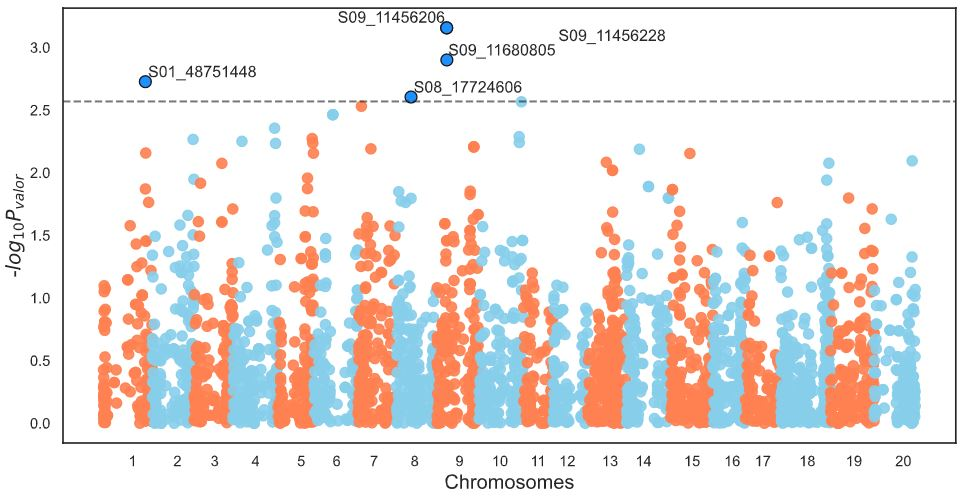

In [63]:
from IPython.display import Image
Image(filename='images/example.JPG') 

## What is the information needed to perform a Manhattan plot?, some clarifications:

The only information needed to perform a simple manhattan plot:
    
    1. The  pvalues from the GWAS
    
    2. The position of each marcker relative to the whole genome
    
    3. The Chromosome to which each marcker belongs
    
    4. The Threshold of significance
    
The second condition is not always provided by some of the most common functions used to generate the tables or dataframes from the GWAS results, usually if the ID associated with each SNP is well tagged (this means the information of ***Chromosome*** and the ***Position within the chromosome*** is represented) the ID could be enough to calculate the global position or position relative to the hole genome, making the pvalues and the ID (or SNP ID) the only variables needed to plot the Manhattan

Ideally, a well structure table containing all the information needed to plot a Manhattan (without forcing us to make an extra effort to prosses that info) should be as follow:

| CHROMOSOME | SNP_ID | POSITION | -log10pvals |
| --- | --- | --- | --- |
| int | str | int | float |

Where:

    1. The Chromosome is needed as a reference to point in the x axis to which one, each marcker belongs. Following the      figure example, the chromosomes are going to be the xticks from our x axis and the datatype is uasually an integer     (int).
    
    2. The SNP_ID or the tag of each marcker is needed to print directly in our plot the identification of the SNP´s that   are having a significant effect on our trait of interest (if wanted), as it shows the example figure. The datatype of    this variable is usually a string (str).
    
    3. The Position SHOULD be relative to the whole genome, but usually this position information that we are provided with, is refere to the chromosome, What does it mean? It means that the position or numeration given to each marcker resets every time we change the chromosome, so many times we are forced to calculate this GLOBAL Position (position relative to  the whole genome) when we want to plot things manually. The datatype is usually an integer.
    
    4. The -log10pvals are needed to plot those little pvalues that are pointing us to significant effects in a way so they can be highlighted visually from the rest. This variable is not more than a simple logarithmic transformation of the pvalues, so it doesn´t really matter if what we get in our GWAS analysis are the pvalues or the -log10pvalues and the datatype is usually a float.

## Hands on the example:

Libraries will appear as they are needed, so the use of them can be explained with a briefly comment:

In [2]:
import pandas as pd#An easy way to manage our data; csv, excel, txt, etc. 
import numpy as np# A great library to perform some handy transformations or applying maths operations along our datasets

In [64]:
#Uploading the GWAS information
GWAS = pd.read_csv('data/GWAS_example.csv',index_col = 0)

In [65]:
GWAS.columns

Index(['CHR', 'P', 'ID', 'POS'], dtype='object')

In [66]:
#Check the infromation so we dont need to do some extra filtering or prosessing
GWAS.head(3)

,CHR,P,ID,POS
1,1,0.515504,S01_153541,153541
2,1,0.407558,S01_156650,156650
3,1,0.076973,S01_293684,293684


In [6]:
GWAS.tail(3)

,CHR,P,ID,POS
3608,20,0.344877,S20_47706065,47706065
3609,20,0.109273,S20_47883245,47883245
3610,20,0.741813,S20_47883292,47883292


In [7]:
GWAS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3610 entries, 1 to 3610
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CHR     3610 non-null   int64  
 1   P       3610 non-null   float64
 2   ID      3610 non-null   object 
 3   POS     3610 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 141.0+ KB


As we verify they are going to be some calculations to be done before diving into the plotting:

    1. The POS variable in this case is the postion relative to the chromosome, so it has to be change to a GLOBAL position, so we can plot each marcker along the x axis.
    
    2.The P variable are all the p values, so a logarithmic transformation should be done.

In [8]:
#Calculating and adding the global position to the GWAS dataframe:
current_pos = 0
cumulative_pos = {}
for chrom, group_df in GWAS.groupby('CHR'):
    global_position = group_df['POS']+current_pos
    current_pos+=group_df['POS'].max()
    cumulative_pos[chrom] = global_position
    
GWAS['GLOBAL_POS'] = pd.concat(cumulative_pos.values()) 

In [9]:
#as the effect of the above logatithm adds a cumulative value, the ideal way to check our new global position is to
#print the last values of our set and check that POS and the new GLOBAL_POS are no the same value:
GWAS.tail()

,CHR,P,ID,POS,GLOBAL_POS
3606,20,0.598978,S20_47544340,47544340,943840887
3607,20,0.084202,S20_47576748,47576748,943873295
3608,20,0.344877,S20_47706065,47706065,944002612
3609,20,0.109273,S20_47883245,47883245,944179792
3610,20,0.741813,S20_47883292,47883292,944179839


In [10]:
#Adding the logarithmic transformation of the pvalues to the GWAS dataframe:
GWAS['Mlog10pvals'] = -np.log10(GWAS['P'])

In [11]:
GWAS.head()

,CHR,P,ID,POS,GLOBAL_POS,Mlog10pvals
1,1,0.515504,S01_153541,153541,153541,0.287768
2,1,0.407558,S01_156650,156650,156650,0.389810
3,1,0.076973,S01_293684,293684,293684,1.113663
4,1,0.849925,S01_293924,293924,293924,0.070619
5,1,0.437485,S01_294507,294507,294507,0.359037


### Manhattan plots using Matplolib:

In [12]:
import matplotlib.pyplot as plt#Matplotlib is a comprehensive library for creating static, animated, 
                               #and interactive visualizations in Python
%matplotlib inline

#### 1_Plotting a simple manhattan plot, binary colors:

In [13]:
#One of the main issues with these plots are colors, for binary colors we can create a list that assigns the same color to
#even chromosomes and a different one to odd chromosomes:
color_1 = ['grey' if x%2 == 0 else 'black' for x in GWAS['CHR']]

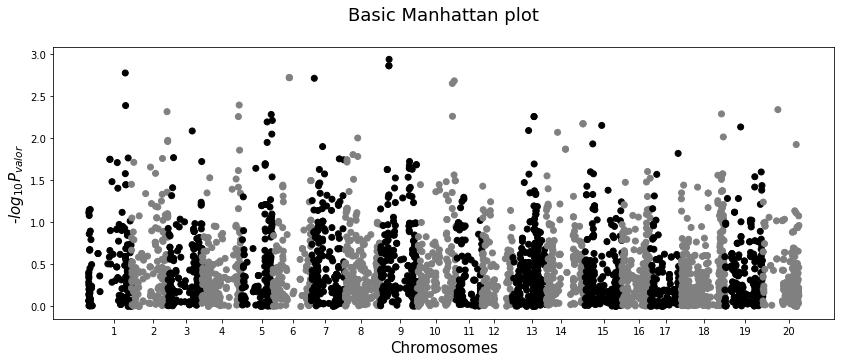

In [14]:
#Plotting a Simple Manhattan plot, binary colors:
fig, ax = plt.subplots(figsize = (14,5))

ax.scatter(GWAS['GLOBAL_POS'], GWAS['Mlog10pvals'], c = color_1, marker='o')


X_ticksPosition = GWAS.groupby('CHR')['GLOBAL_POS'].mean().tolist()
X_ticksLabels = GWAS.CHR.unique().tolist()
ax.set_xticks(X_ticksPosition)
ax.set_xticklabels(X_ticksLabels)
ax.set_xlabel('Chromosomes',fontsize = 15)
ax.set_ylabel('-$log_{10} P_{valor}$',fontsize = 15)
plt.title('Basic Manhattan plot\n', fontsize = 18)

plt.show()

#### 2_Plotting a simple manhattan plot whith threshold in binary colors:

In [15]:
#As told before, the inclusion of a Threshold is key to point those marckers with significant effects:
THR = 2.5692709681809

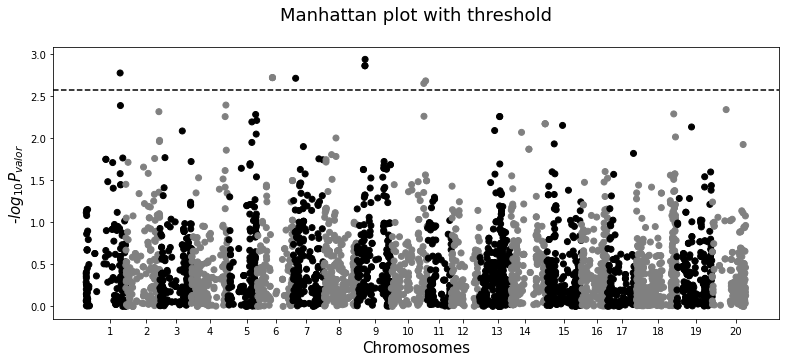

In [16]:
#Plotting a Simple Manhattan plot whith Threshold in binary colors:
fig, ax = plt.subplots(figsize = (13,5))

ax.scatter(GWAS['GLOBAL_POS'], GWAS['Mlog10pvals'], c = color_1, marker='o')

ax.axhline(y=THR, color="k", linestyle="--")#vertical line for our THReshold

X_ticksPosition = GWAS.groupby('CHR')['GLOBAL_POS'].mean().tolist()
X_ticksLabels = GWAS.CHR.unique().tolist()
ax.set_xticks(X_ticksPosition)
ax.set_xticklabels(X_ticksLabels)
ax.set_xlabel('Chromosomes',fontsize = 15)
ax.set_ylabel('-$log_{10} P_{valor}$',fontsize = 15)
plt.title('Manhattan plot with threshold\n', fontsize = 18)

plt.show()

#### 3_Plotting a simple manhattan plot whith threshold in binary colors and significant marckers highlighed:

In [17]:
#Something useful to plot are the marckers over the threshold in a different color:
color_2 = ['red' if x >= THR else ('grey' if GWAS['CHR'].tolist()[i] %2 == 0 else 'black') for i,
           x in enumerate(GWAS['Mlog10pvals'])]

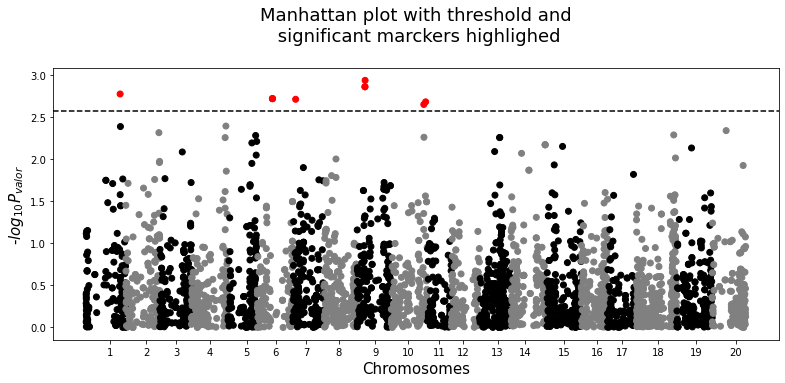

In [18]:
#Plotting a Simple Manhattan plot whith Threshold in binary colors and significant marckers highlighed:
fig, ax = plt.subplots(figsize = (13,5))
ax.scatter(GWAS['GLOBAL_POS'], GWAS['Mlog10pvals'],
           c = color_2, 
           marker='o')

ax.axhline(y=THR, color="k", linestyle="--")

X_ticksPosition = GWAS.groupby('CHR')['GLOBAL_POS'].mean().tolist()
X_ticksLabels = GWAS.CHR.unique().tolist()
ax.set_xticks(X_ticksPosition)
ax.set_xticklabels(X_ticksLabels)
ax.set_xlabel('Chromosomes',fontsize = 15)
ax.set_ylabel('-$log_{10} P_{valor}$',fontsize = 15)
plt.title('Manhattan plot with threshold and\n significant marckers highlighed\n', fontsize = 18)

plt.show()

#### 4_Plotting a simple manhattan plot whith threshold in binary colors and significant marckers highlighed and tagged:

In [19]:
from adjustText import adjust_text#adjustText is a small library to help you adjust text positions on matplotlib plots to 
                                  #remove or minimize overlaps with each other and data points

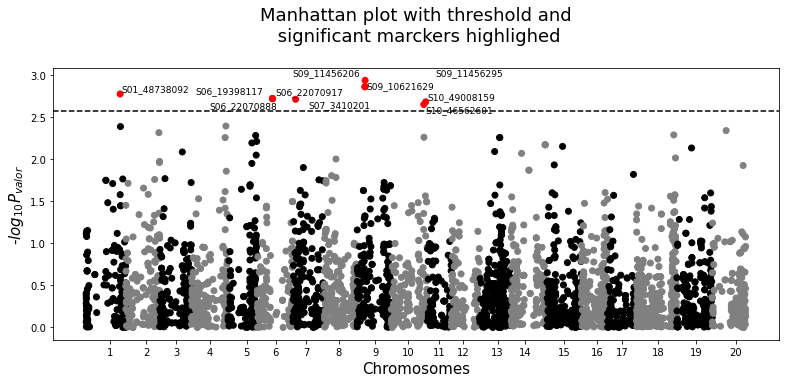

In [20]:
#Plotting a Simple Manhattan plot whith Threshold in binary colors and significant marckers highlighed and tagged:
fig, ax = plt.subplots(figsize = (13,5))

ax.scatter(GWAS['GLOBAL_POS'], GWAS['Mlog10pvals'], c = color_2, marker='o')

ax.axhline(y=THR, color="k", linestyle="--")

X_ticksPosition = GWAS.groupby('CHR')['GLOBAL_POS'].mean().tolist()
X_ticksLabels = GWAS.CHR.unique().tolist()
ax.set_xticks(X_ticksPosition)
ax.set_xticklabels(X_ticksLabels)
ax.set_xlabel('Chromosomes',fontsize = 15)
ax.set_ylabel('-$log_{10} P_{valor}$',fontsize = 15)
plt.title('Manhattan plot with threshold and\n significant marckers highlighed\n', fontsize = 18)

#Tagging our significant marckers by their ID:
tagged = [ax.text(GWAS['GLOBAL_POS'][i],x,GWAS['ID'][i], size=9) for i, x in enumerate(GWAS['Mlog10pvals']) if x >= THR]
adjust_text(tagged)

plt.show()

#### 5_Plotting multiple colors per chromosome: 

In [21]:
#adding extracolor to our plots:
import matplotlib.colors as mcolors#importing a list of the named colors supported in matplotlib

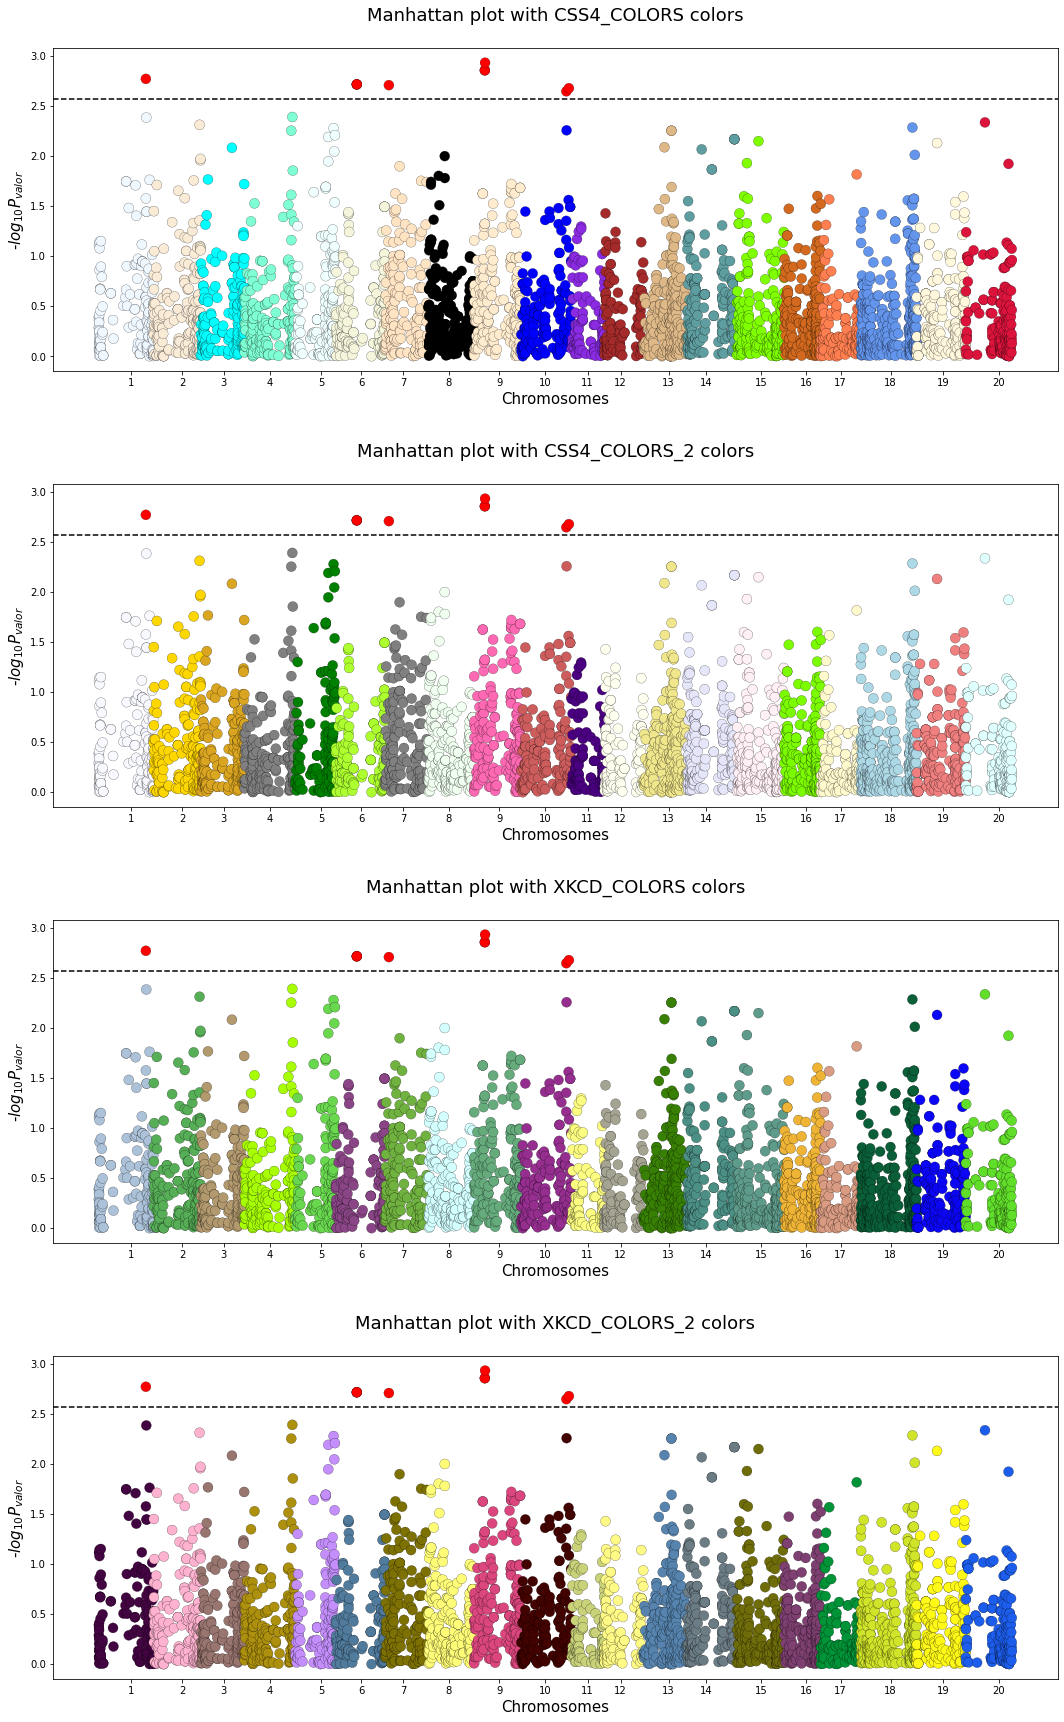

In [22]:
#Some colors examples extracted from CSS4_COLORS and XKCD_COLORS palettes:
CSS4_COLORS = {CHR: list(mcolors.CSS4_COLORS.values())[color] for color, CHR in enumerate(GWAS['CHR'].unique())}
CSS4_COLORS_2 = {CHR: list(mcolors.CSS4_COLORS.values())[color+50] for color, CHR in enumerate(GWAS['CHR'].unique())}
XKCD_COLORS = {CHR: list(mcolors.XKCD_COLORS.values())[color] for color, CHR in enumerate(GWAS['CHR'].unique())}
XKCD_COLORS_2 = {CHR: list(mcolors.XKCD_COLORS.values())[color+50] for color, CHR in enumerate(GWAS['CHR'].unique())}



fig, axs = plt.subplots(4, figsize=(18,30))
fig.subplots_adjust(hspace=0.35, wspace=0.3)
colors=['CSS4_COLORS', 'CSS4_COLORS_2', 'XKCD_COLORS', 'XKCD_COLORS_2']
for i, v in enumerate(axs):
    axs[i].axhline(y=THR, color="k", linestyle="--")
    axs[i].scatter(GWAS['GLOBAL_POS'], GWAS['Mlog10pvals'],
               c =['red' if x >= THR else eval(colors[i])[GWAS['CHR'][z+1]] for z, x in enumerate(GWAS['Mlog10pvals'])],
               s = 100, 
               marker='o',
               edgecolors='k',
               linewidth = 0.2,
               alpha = 1)
    axs[i].set_xticks(GWAS.groupby('CHR')['GLOBAL_POS'].mean().tolist())
    axs[i].set_xticklabels(GWAS.CHR.unique().tolist())
    axs[i].set_xlabel('Chromosomes',fontsize = 15)
    axs[i].set_ylabel('-$log_{10} P_{valor}$',fontsize = 15)
    axs[i].set_title('Manhattan plot with {} colors\n'.format(colors[i]), fontsize = 18)

    
#Colors can be also manually selected...

### Manhattan plots using Seaborn:


In [23]:
import seaborn as sns#Seaborn is a Python data visualization library based on matplotlib. 
                     #It provides a high-level interface for drawing attractive and informative statistical graphics

#### 1_ Using the scatterplot function from seaborn:

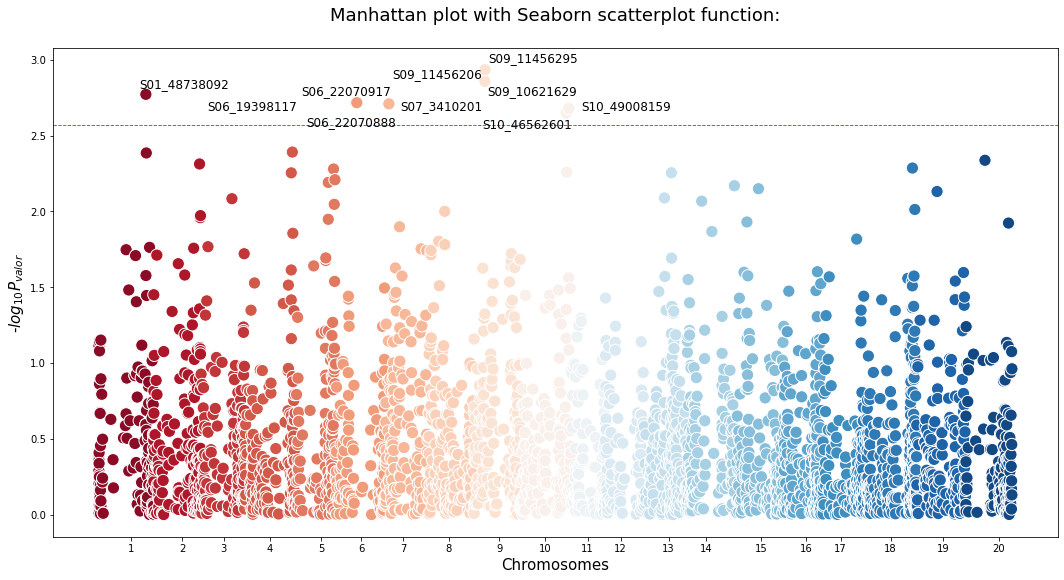

In [24]:
#An easy approuch using the scatter function from seaborn:
#Creating a dictionary for the palette argument of seaborn scatterplot function:
Seaborn_RdBu_palatte = {CHR: [i for i in sns.color_palette("RdBu",20).as_hex()][color] for color, 
                  CHR in enumerate(GWAS['CHR'].unique())}

fig, ax = plt.subplots(figsize =(18,9))

Manh_plt = sns.scatterplot(ax = ax, 
                           x=GWAS['GLOBAL_POS'], y=GWAS['Mlog10pvals'], 
                           hue=GWAS['CHR'], 
                           palette = Seaborn_RdBu_palatte,
                           s=150,
                           legend =False)

Manh_plt.axhline(THR, linestyle = '--', linewidth=0.9)
tagged = [Manh_plt.text(GWAS['GLOBAL_POS'][i],x,GWAS['ID'][i], size=12) for i, x in enumerate(GWAS['Mlog10pvals']) if x >= THR]
adjust_text(tagged)
plt.xticks(GWAS.groupby('CHR')['GLOBAL_POS'].mean().tolist(), GWAS.CHR.unique().tolist())
ax.set_xlabel('Chromosomes',fontsize = 15)
ax.set_ylabel('-$log_{10} P_{valor}$',fontsize = 15)
plt.title('Manhattan plot with Seaborn scatterplot function:\n', fontsize = 18)

plt.show()

#### 2_ Using relplot from seaborn:

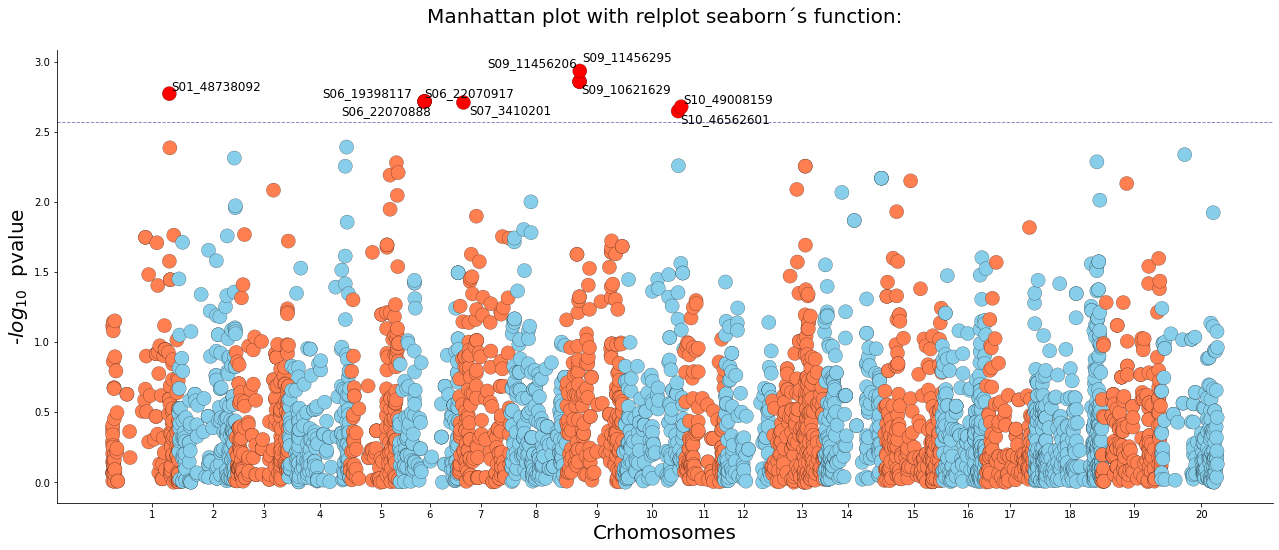

In [25]:
new_color = ['red' if x >= THR else ('skyblue' if GWAS['CHR'].tolist()[i] %2 == 0 else 'coral') for i,
           x in enumerate(GWAS['Mlog10pvals'])]

grph = sns.relplot(x=GWAS['GLOBAL_POS'], 
                y=GWAS['Mlog10pvals'], 
                hue=new_color, 
                palette = sorted(set(new_color)), 
                legend = False,
                height = 7,
                aspect =2.5, 
                s = 200,
                linewidth = .2,
                edgecolor = 'k')

grph.ax.axhline(THR, linestyle = '--', linewidth=0.9, color = 'navy', alpha=.5)
grph.ax.set_xticks(GWAS.groupby('CHR')['GLOBAL_POS'].mean().tolist())
grph.ax.set_xticklabels(GWAS['CHR'].unique())
grph.ax.set_xlabel ('Crhomosomes', fontsize=20)
grph.ax.set_ylabel ('-$log_{10}$  pvalue', fontsize=20)
grph.ax.set_title('Manhattan plot with relplot seaborn´s function:\n',fontsize=20)

tagged = [grph.ax.annotate(GWAS['ID'][i],
                           (GWAS['GLOBAL_POS'][i],x),
                           size=12) for i, x in enumerate(GWAS['Mlog10pvals']) if x >= THR]
adjust_text(tagged)

plt.show()

### Manhattan plots using Bokeh:

In [26]:
from bokeh.io import output_notebook, reset_output,output_file
from bokeh.plotting import figure,show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import HoverTool, ColumnDataSource, Label, Span
from bokeh.palettes import all_palettes, brewer, mpl, inferno, magma
output_notebook()

Loading BokehJS ...

In [27]:
colors = list(mpl['Plasma'][4]*5)

In [46]:
scatter_plot =  figure(plot_width = 900,
                       plot_height = 400,
                       title = 'Interactive Manhattan plot with Bokeh\n',
                       tools="hover", 
                       tooltips="@ID")

source = ColumnDataSource(data = dict(x = GWAS['GLOBAL_POS'],
                                      y =  GWAS['Mlog10pvals'],
                                      ID = GWAS['ID'].tolist(),
                                      CHR = [str(i) for i in GWAS['CHR']]))#In this particuilar case CHR values should be str

colors_cmap = factor_cmap('CHR', 
                          palette = colors, 
                         factors = [str(i) for i in GWAS['CHR'].unique()])

scatter_plot.scatter('x','y', 
                     source = source,
                     size=15, fill_alpha=.5,
                     fill_color=colors_cmap)

x_ticks_position = GWAS.groupby('CHR')['GLOBAL_POS'].mean().tolist()
scatter_plot.xaxis.ticker = x_ticks_position
scatter_plot.xaxis.major_label_overrides = {v: str(i+1) for i, v in enumerate(x_ticks_position)}
scatter_plot.title.text_font_size = '15pt'

hline = Span(location=THR, dimension='width', line_color='red', line_width=1)
scatter_plot.renderers.extend([hline])
show(scatter_plot)

### Some extra ideas...

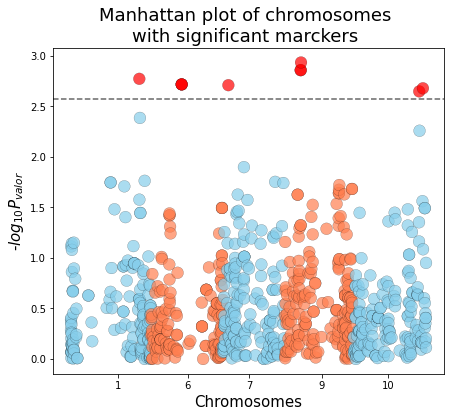

In [29]:
#Plotting only the chromosomes with significant marckers:
auxiliar_pos = 0 #for plotting purposes only
significant_chrom = {}
for chrom, group_df in GWAS.groupby('CHR'):
    for i, v in enumerate(group_df['Mlog10pvals']):
        if v >= THR:
            selected_df = group_df
            selected_df['Global_Pos'] = selected_df['POS']+auxiliar_pos
            auxiliar_pos+=selected_df['POS'].max()
            significant_chrom[chrom] = selected_df
            break       
    
signicant_GWAS = pd.concat(significant_chrom.values())
signicant_GWAS.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize = (7,6))
THR = 2.5692709681809

for_colors = {v: i+1 for i,v in enumerate(signicant_GWAS['CHR'].unique())}
ax.scatter(signicant_GWAS['Global_Pos'], signicant_GWAS['Mlog10pvals'],
           c = ['red' if x >= THR else ('coral' if for_colors[signicant_GWAS['CHR'].tolist()[i]] %2 == 0 else 'skyblue') for i,
                x in enumerate(signicant_GWAS['Mlog10pvals'])], 
           s = 140, 
           marker='o', 
           edgecolors='k', 
           linewidth = 0.2, 
           alpha = 0.7)

ax.axhline(y=THR, color="k", linestyle="--", alpha=.6)


ax.set_xticks(signicant_GWAS.groupby('CHR')['Global_Pos'].mean().tolist())
ax.set_xticklabels(signicant_GWAS.CHR.unique().tolist())
ax.set_xlabel('Chromosomes',fontsize = 15)
ax.set_ylabel('-$log_{10} P_{valor}$',fontsize = 15)
plt.title('Manhattan plot of chromosomes \nwith significant marckers ', fontsize = 18)

plt.show()

In [51]:
np.arange(-4,4,1)

array([-4, -3, -2, -1,  0,  1,  2,  3])

In [55]:
list(np.arange(-4,0,1)*-1)+list(np.arange(0,4,1))

[4, 3, 2, 1, 0, 1, 2, 3]

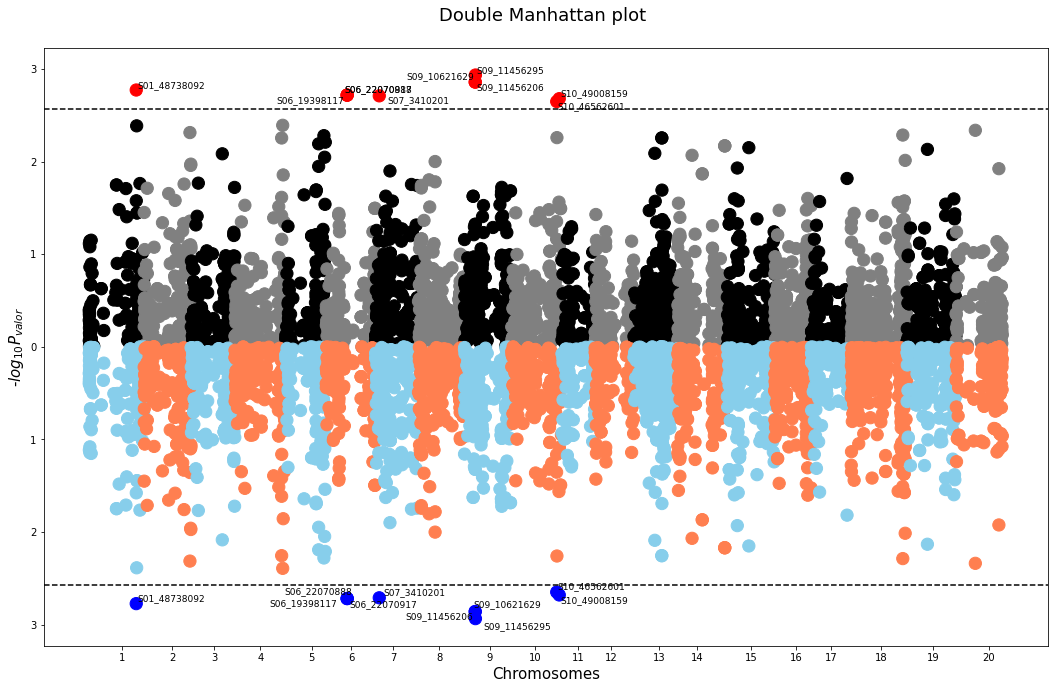

In [60]:
#Plotting simetric manhattanplots
fig, ax = plt.subplots(figsize = (18,11))

ax.scatter(GWAS['GLOBAL_POS'], GWAS['Mlog10pvals'],
           c = ['red' if x >= THR else ('grey' if GWAS['CHR'].tolist()[i] %2 == 0 else 'black') for i,
                x in enumerate(GWAS['Mlog10pvals'])], 
           marker='o',
          s=150)
tagged = [ax.text(GWAS['GLOBAL_POS'][i],x,GWAS['ID'][i], size=9) for i, x in enumerate(GWAS['Mlog10pvals']) if x >= THR]
adjust_text(tagged)

ax.scatter(GWAS['GLOBAL_POS'], GWAS['Mlog10pvals']*(-1),
           c = ['blue' if x >= THR else ('coral' if GWAS['CHR'].tolist()[i] %2 == 0 else 'skyblue') for i,
                x in enumerate(GWAS['Mlog10pvals'])], 
           marker='o',
          s=150)
tagged = [ax.text(GWAS['GLOBAL_POS'][i],x*-1,GWAS['ID'][i], size=9) for i, x in enumerate(GWAS['Mlog10pvals']) if x >= THR]
adjust_text(tagged)

ax.axhline(y=THR, color="k", linestyle="--")
ax.axhline(y=-THR, color="k", linestyle="--")

X_ticksPosition = GWAS.groupby('CHR')['GLOBAL_POS'].mean().tolist()
X_ticksLabels = GWAS.CHR.unique().tolist()
Y_ticksPosition = list(np.arange(-3,4,1))
Y_ticksLabels = list(np.arange(-3,0,1)*-1)+list(np.arange(0,4,1))
ax.set_xticks(X_ticksPosition)
ax.set_xticklabels(X_ticksLabels)
ax.set_yticks(Y_ticksPosition)
ax.set_yticklabels(Y_ticksLabels)
ax.set_xlabel('Chromosomes',fontsize = 15)
ax.set_ylabel('-$log_{10} P_{valor}$',fontsize = 15)
plt.title('Double Manhattan plot \n', fontsize = 18)

plt.show()